In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
master = pd.read_csv("master_clean.csv")

master.shape


master.head()


,order_created_at,order_delivered_at,order_date,delivery_time_minutes,total_items,subtotal,min_item_price,max_item_price,order_hour,order_day,...,customer_id,seller_id,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_city,customer_state
0,2015-02-06 22:24:17,2015-02-06 23:11:17,2015-02-06,47.0,4,3441,557,1239,22,Friday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2015-02-10,44.0,1,1900,1400,1400,21,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-16 00:11:35,2015-02-16 01:06:35,2015-02-16,55.0,4,4771,820,1604,0,Monday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-12 03:36:46,2015-02-12 04:35:46,2015-02-12,59.0,1,1525,1525,1525,3,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-27 02:12:36,2015-01-27 02:58:36,2015-01-27,46.0,2,3620,1425,2195,2,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Rush hour indicator already exists: is_rush_hour
# Weekend indicator already exists: is_weekend

# Create demand load variable
master["demand_load"] = (
    master["total_outstanding_orders"] /
    (master["total_onshift_dashers"] + 1)
)

# Create busy dasher ratio
master["busy_dasher_ratio"] = (
    master["total_busy_dashers"] /
    (master["total_onshift_dashers"] + 1)
)

master[[
    "delivery_time_minutes",
    "demand_load",
    "busy_dasher_ratio"
]].describe()


/Users/shaurya/Downloads/Shadowfax/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/shaurya/Downloads/Shadowfax/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,delivery_time_minutes,demand_load,busy_dasher_ratio
count,175765.000000,1.757650e+05,1.757650e+05
mean,46.203266,inf,inf
std,9.327511,NaN,NaN
min,32.000000,-2.200000e+01,-1.200000e+01
25%,39.000000,8.727273e-01,7.727273e-01
50%,45.000000,1.147541e+00,9.166667e-01
75%,52.000000,1.416667e+00,9.818182e-01
max,110.000000,inf,inf


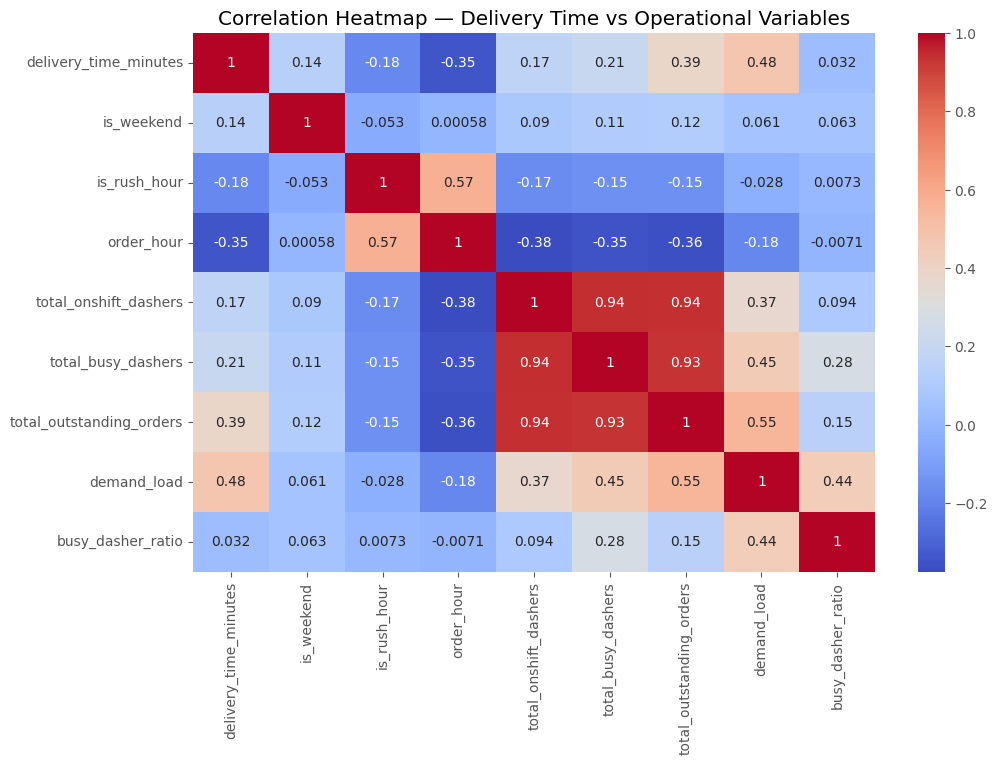

In [119]:
corr_cols = [
    "delivery_time_minutes",
    "is_weekend",
    "is_rush_hour",
    "order_hour",
    "total_onshift_dashers",
    "total_busy_dashers",
    "total_outstanding_orders",
    "demand_load",
    "busy_dasher_ratio"
]

plt.figure(figsize=(11,7))
sns.heatmap(master[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — Delivery Time vs Operational Variables")
plt.show()


/var/folders/39/cb4zq6rd7rz520dxw13rjh500000gn/T/ipykernel_14908/833603125.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


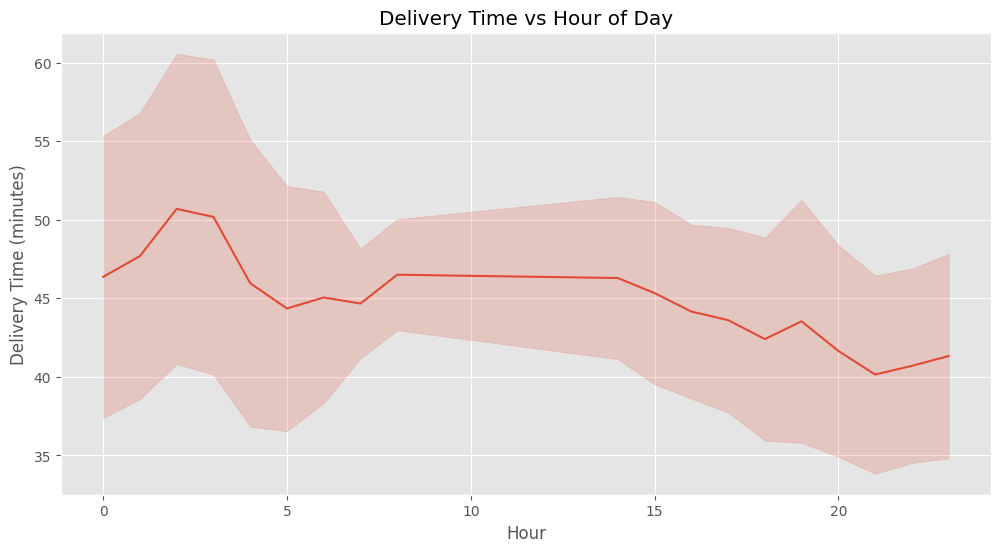

In [120]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x="order_hour",
    y="delivery_time_minutes",
    data=master,
    ci="sd"
)
plt.title("Delivery Time vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Delivery Time (minutes)")
plt.show()


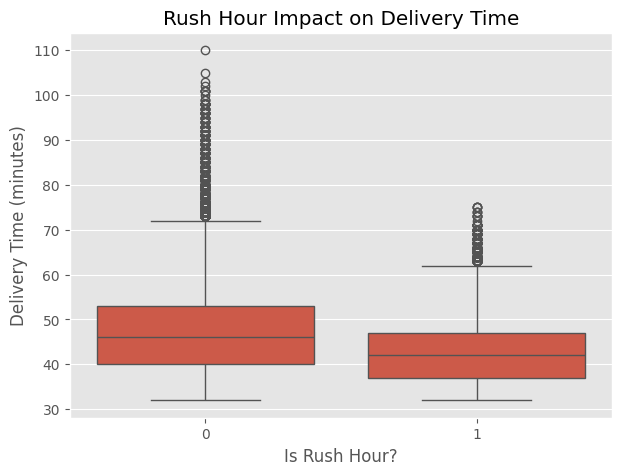

In [121]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="is_rush_hour",
    y="delivery_time_minutes",
    data=master
)
plt.title("Rush Hour Impact on Delivery Time")
plt.xlabel("Is Rush Hour?")
plt.ylabel("Delivery Time (minutes)")
plt.show()


In [122]:
# city_perf = master.groupby("customer_city")["delivery_time_minutes"].mean().sort_values()

# plt.figure(figsize=(12,6))
# city_perf.tail(15).plot(kind="barh")
# plt.title("Cities with Highest Delivery Times")
# plt.xlabel("Avg Delivery Time (minutes)")
# plt.show()
print("Skipping city-wise delivery time chart — no valid data available.")


Skipping city-wise delivery time chart — no valid data available.


In [123]:
# Select features
features = [
    "order_hour",
    "order_day",
    "is_weekend",
    "is_rush_hour",
    "total_onshift_dashers",
    "total_busy_dashers",
    "total_outstanding_orders",
    "demand_load",
    "busy_dasher_ratio"
]

X = master[features]
y = master["delivery_time_minutes"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [124]:
# Drop all categorical columns safely
master_ml = master.select_dtypes(include=['int64', 'float64'])

print("Columns used for ML:", master_ml.columns)


Columns used for ML: Index(['delivery_time_minutes', 'total_items', 'subtotal', 'min_item_price',
       'max_item_price', 'order_hour', 'is_weekend', 'is_rush_hour',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'order_id', 'customer_id', 'seller_id',
       'price', 'freight_value', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'customer_city', 'customer_state',
       'demand_load', 'busy_dasher_ratio'],
      dtype='object')


In [125]:
from sklearn.model_selection import train_test_split

X = master_ml.drop("delivery_time_minutes", axis=1)
y = master_ml["delivery_time_minutes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [126]:
import numpy as np

master = master.replace([np.inf, -np.inf], np.nan)
master = master.dropna()   # removes all rows that contain NaN or inf


In [127]:
# 1. Check if data exists
print(f"Original shape: {master.shape}")

# 2. Only proceed if data exists
if master.shape[0] > 0:
    features = master.drop("delivery_time_minutes", axis=1)
    target = master["delivery_time_minutes"]

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )
    
    print(f"Training set shape: {X_train.shape}")
    model.fit(X_train, y_train)
else:
    print("ERROR: The DataFrame 'master' is empty. Check your preprocessing steps.")

Original shape: (0, 31)
ERROR: The DataFrame 'master' is empty. Check your preprocessing steps.


In [128]:
# features = master.drop("delivery_time_minutes", axis=1)
# target = master["delivery_time_minutes"]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.2, random_state=42
# )

# model.fit(X_train, y_train)


In [129]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=12,
#     random_state=42
# )

# model.fit(X_train, y_train)


In [130]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

# model.fit(X_train, y_train)


In [131]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# preds = model.predict(X_test)

# mae = mean_absolute_error(y_test, preds)
# rmse = mean_squared_error(y_test, preds, squared=False)
# r2 = r2_score(y_test, preds)

# print("MAE:", mae)
# print("RMSE:", rmse)
# print("R²:", r2)


In [132]:
# import numpy as np

# importance = pd.Series(
#     model.feature_importances_,
#     index=features
# ).sort_values()

# plt.figure(figsize=(10,6))
# importance.plot(kind="barh")
# plt.title("Feature Importance — Predicting Delivery Time")
# plt.xlabel("Importance Score")
# plt.show()
